In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('mnist_train.csv',header = None)
data = np.array(df)
x = (data[:,1:].transpose())/255
m = x.shape[1]
n = x.shape[0]
y_orig = data[:,0:1].transpose()
y = np.zeros((10,m))    #one hot encoding vimportant
for i in range(m): 
    y[int(y_orig[0,i]),i] = 1

In [2]:
def relu(x):
    reluu = np.maximum(x,0)
    return reluu

In [3]:
def backrelu(x):
    result = (x + np.abs(x))/(2*np.abs(x))
    return result

In [4]:
def softmax(x):
    expp = np.exp(x)
    some = np.sum(expp, axis=0, keepdims=True)
    result = expp/some
    return result

In [5]:
def layer_parameters(): 
    for z in range(1,len(layers)):
        w = np.random.randn(layers[z],layers[z-1])*0.01
        b = np.zeros((layers[z],1))
        w_cache["w" + str(z)] = w
        b_cache["b" + str(z)] = b
    
    parameters = {"w_cache" : w_cache,
                  "b_cache" : b_cache}
    
    return parameters

In [6]:
def linear_forward(parameters,x):
    
    a_cache['a0'] = x
    activation = x
    
    for l in range(1,len(layers)-1):
        w = parameters["w_cache"]["w" + str(l)]
        b = parameters["b_cache"]["b" + str(l)]
        z = np.dot(w,activation) + b
        activation = relu(z)
        z_cache["z" + str(l)] = z
        a_cache["a" + str(l)] = activation
    
    w = parameters["w_cache"]["w" + str(l+1)]
    b = parameters["b_cache"]["b" + str(l+1)]
    z = np.dot(w,activation) + b
    y_hat = softmax(z)
    z_cache["z" + str(l+1)] = z
    a_cache["a" + str(l+1)] = y_hat
    
    return y_hat

In [7]:
def cost_function(y_hat):
    cost = np.sum(y*np.log(abs(y_hat))) + np.sum((1-y)*np.log(abs(1-y_hat)))
    cost = -(cost)/m
    
    return cost

In [8]:
def myback(z_cache,w_cache,a_cache,y_hat,layers):
    
    l = len(layers)-1
    w_l = w_cache["w" + str(l)]
    a_l = a_cache["a" + str(l-1)]
    
    dz = y_hat - y
    da = np.dot(w_l.T,dz)
    dw_l = 1/m*(np.dot(dz,a_l.T))
    db_l = 1/m*(np.sum(dz,axis=1,keepdims=True))
    
    dw_cache["dw" + str(l)] = dw_l
    db_cache["db" + str(l)] = db_l
    
    for what in range(l-1,0,-1):
        z_l = z_cache["z" + str(what)]
        w_l = w_cache["w" + str(what)]
        a_l = a_cache["a" + str(what-1)]
        
        dz = da*backrelu(z_l)
        dw_l = 1/m*(np.dot(dz,a_l.T))
        db_l = 1/m*(np.sum(dz,axis=1,keepdims=True))
        da_l = np.dot(w_l.T,dz)
        
        da = da_l
        
        dw_cache["dw" + str(what)] = dw_l
        db_cache["db" + str(what)] = db_l

        
    return dw_cache,db_cache

In [9]:
def update_parameters(w_cache,b_cache,dw_cache,db_cache,layers):
    
    L = len(layers)
    lum=1
    while lum < L:
        w_cache["w" + str(lum)] = w_cache["w" + str(lum)] - alpha*dw_cache["dw" + str(lum)]
        b_cache["b" + str(lum)] = b_cache["b" + str(lum)] - alpha*db_cache["db" + str(lum)]
        lum = lum + 1
    
    parametrics = {"w_cache" : w_cache,
                  "b_cache" : b_cache}
    
    return parametrics

In [10]:
def model(X,Y,layers,alpha,number_iters):
    costs = []
    parameters = layer_parameters()
    for j in range(number_iters):
        y_hat = linear_forward(parameters,X)
        cost = cost_function(y_hat)
        costs.append(cost)
        dw_cache,db_cache = myback(z_cache,w_cache,a_cache,y_hat,layers)
        parameters = update_parameters(w_cache,b_cache,dw_cache,db_cache,layers)
        print(j,"\t",cost)
    return parameters,costs

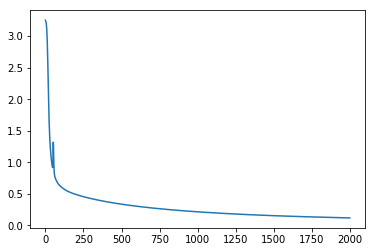

In [12]:
plt.plot(costs)

In [13]:
#training
df = pd.read_csv('mnist_test.csv',header = None)
data = np.array(df)
X_test = (data[:,1:].transpose())/255
Y_test = data[:,0:1].transpose()
accuracy = 0
m_test = X_test.shape[1]
predict = np.zeros((1,m_test))
A_test = linear_forward(parameters,X_test)
for i in range(m_test):
    max = 0
    for j in range(10):
        if A_test[j,i] > max:
            max = A_test[j,i]
            max_index = j
        predict[0,i] = max_index
    if predict[0,i] == Y_test[0,i]:
        accuracy = accuracy + 1
accuracy = (accuracy/m_test)*100
print(accuracy,"%")
index = 0

97.47 %


In [401]:
import csv
import numpy as np
x_1=[]
y_1=[]
with open('data.csv','rt')  as f:
    data = csv.reader(f)
    for row in data:
        x_1.append(row[:2])
        y_1.append(row[2:])

In [22]:
x=np.array(x_1[0:],dtype=np.float).T
y=np.array(y_1[0:],dtype=np.float).T

In [23]:
layer = [2,5,5,1]
w_cache = dict()
b_cache = dict()
z_cache = dict()
a_cache = dict()
m=118

In [36]:
def layer_parameters(): 
    num_layers = 4
    for z in range(1,num_layers):
        w = np.random.randn(layer[z],layer[z-1])*0.01
        b = np.zeros((layer[z],1))
        w_cache["w" + str(z)]=w
        b_cache["b" + str(z)]=b
        print('w',w.shape)
        print('b', b.shape)
    
    parameters = {"w_cache" : w_cache,
                  "b_cache" : b_cache}
    #print('i got parameters')
    
    return parameters

In [37]:
def linear_forward(parameters,activation,i):
    w = parameters["w_cache"]["w" + str(i)]
    b = parameters["b_cache"]["b" + str(i)]
    
    z = np.dot(w,activation) + b
    #print('w shape', w.shape)
    #print('a shape', activation.shape)
    #print('z shape', z.shape)
    activation = np.tanh(z)
    z_cache["z" + str(i)]=z
    a_cache["a" + str(i+1)]=activation
    #print('activation shape', activation.shape)
    i+=1
    #print('i got linear forward')
    if i == len(layer):
        return activation
    else:
        return linear_forward(parameters,activation,i)

In [38]:
def cost_function(y_hat):
    print('chal hatt',y_hat.shape)
    cost = np.dot(y,np.log(abs(y_hat)).T) + np.dot((1-y),np.log(abs(1-y_hat)).T)
    cost = -cost/118
    #print("i got cost which is",cost)
    
    return cost

In [39]:
def backward_propagation(w_cache,z_cache,a_cache,da,layer_number):
    
    
    
    for what in range(0,4):
        z_l = z_cache["z" + str(layer_number)]
        w_l = w_cache["w" + str(layer_number)]
        a_l = a_cache["a" + str(layer_number)]
    
        print('z_l shape', z_l.shape)
        print('a_l shape', a_l.shape)
        print('w_l shape', w_l.shape)
    
        dz = np.multiply(da,1-np.power(z_l,2))
        print('dz shape', dz.shape)
    to
        dw_l = 1/m*(np.dot(dz,a_l.T))
        print('dw_l shaep', dw_l.shape)
    
        db_l = 1/m*(np.sum(dz,axis=1,keepdims=True))
        da_l = np.dot(w_l.T,dz)
        print('da shape', da_l.shape)
        w_cache = update_parameters(dw_l,db_l,layer_number,w_cache,b_cache,alpha=0.7)
        layer_number+=1
        da = da_l
    #print('i got backward')

In [40]:
def update_parameters(dw_l,db_l,layer_number,w_cache,b_cache,alpha = 0.7):
    w_cache["w" + str(layer_number)] = w_cache["w" + str(layer_number)] - alpha*dw_l
    b_cache["b" + str(layer_number)] = b_cache["b" + str(layer_number)] - alpha*db_l
    
    print('WHAT THE FUCCC')
    
    return w_cache

In [41]:
def nn_model(x,y,l):
    
    parameters = layer_parameters()
    
    a_cache["a" + str(l)] = x
    activation = x
    
    y_hat = linear_forward(parameters,activation,l)
    cost = cost_function(y_hat)
    
    da = - (y/y_hat) - ((1-y)/(1-y_hat))
    
    backward_propagation(w_cache,z_cache,a_cache,da,layer_number)
    
    #print('i did it boi')
    return None

In [42]:
layer_number=1
i=1
a_cache['a' + str(i)] = x
u = nn_model(x,y,i)

w (5, 2)
b (5, 1)
w (5, 5)
b (5, 1)
w (1, 5)
b (1, 1)
chal hatt (1, 118)
z_l shape (5, 118)
a_l shape (2, 118)
w_l shape (5, 2)
dz shape (5, 118)
dw_l shaep (5, 2)
da shape (2, 118)
WHAT THE FUCCC
z_l shape (5, 118)
a_l shape (5, 118)
w_l shape (5, 5)


ValueError: operands could not be broadcast together with shapes (2,118) (5,118) 

In [3]:
for i in range (0,5):
    print(i)

0
1
2
3
4


In [4]:
a = (1,2,3,4,5,6,98,87)

In [5]:
for i, data in enumerate(a):
    print(i,data)

0 1
1 2
2 3
3 4
4 5
5 6
6 98
7 87
